# Task 2 : Problems of Decision Making and Learning from Examples

## Subtask 2.1 Decision  Networks

<hr>

Consider a student who has the choice of whether to buy or not a textbook for a course. We’ll model this situation as a decision network problem with:

- One Boolean decision node, 𝑏, indicating whether the student chooses to buy the book.
- One Boolean chance nodes, 𝑚, indicating whether the student has mastered the material in the book.
- One Boolean chance node 𝑝, indicating whether the student passes the course.

For this item you should:

```
a. Draw the decision network for this problem (2 marks).
```


I beleive both m and p could affect the decision of buying the book. So, I have drawn the decision network for both as below.


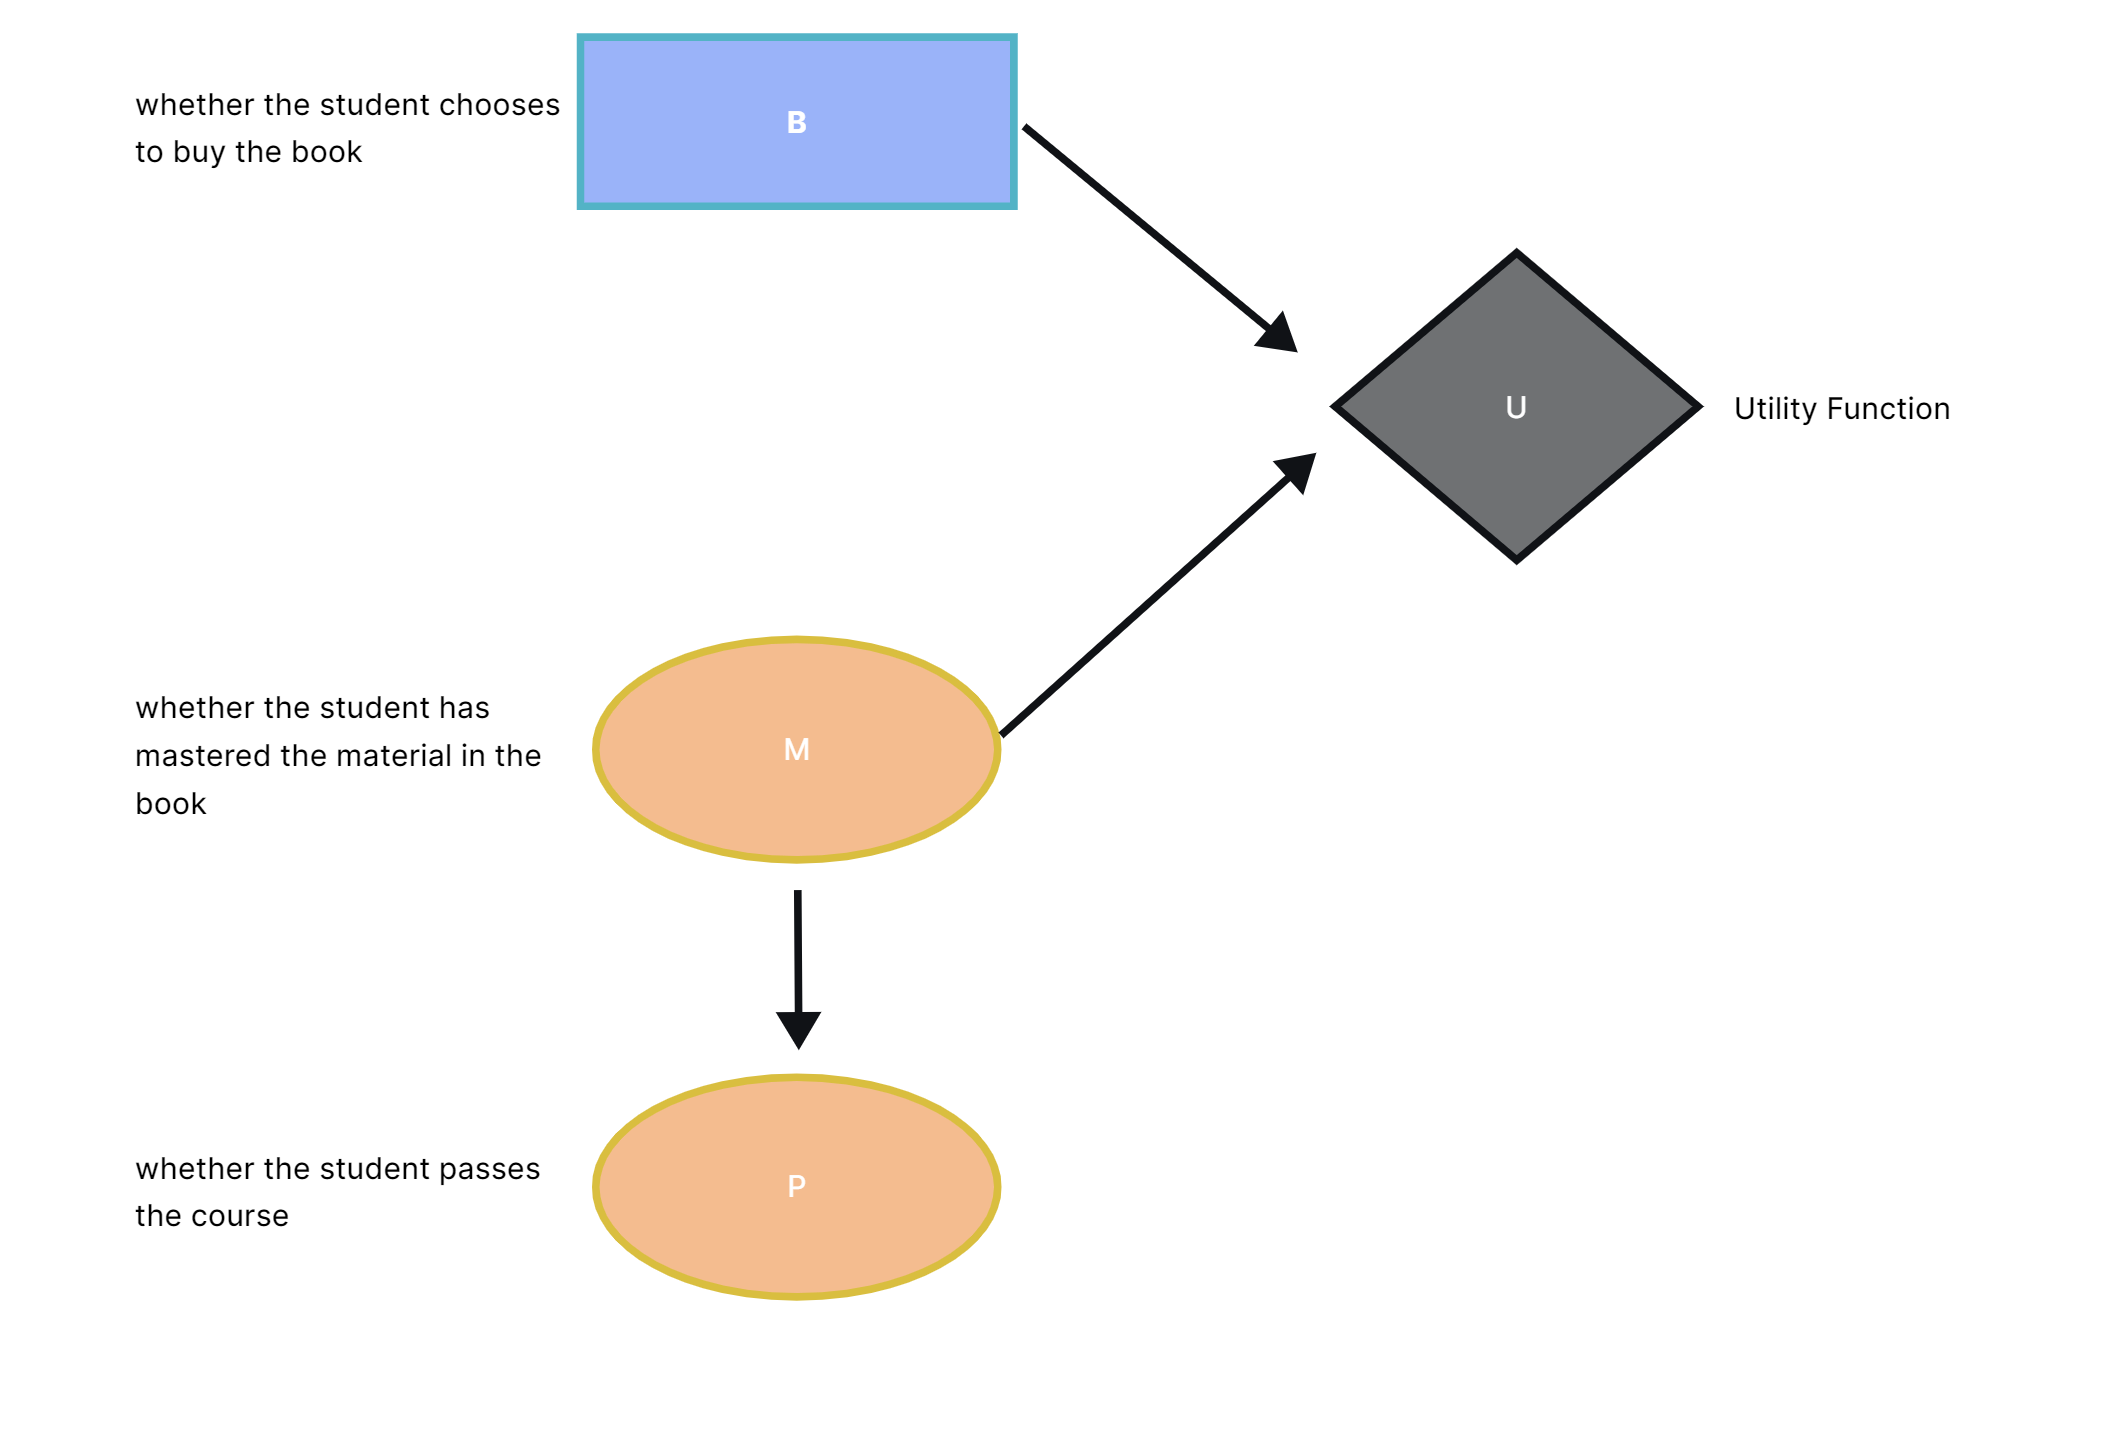

OR


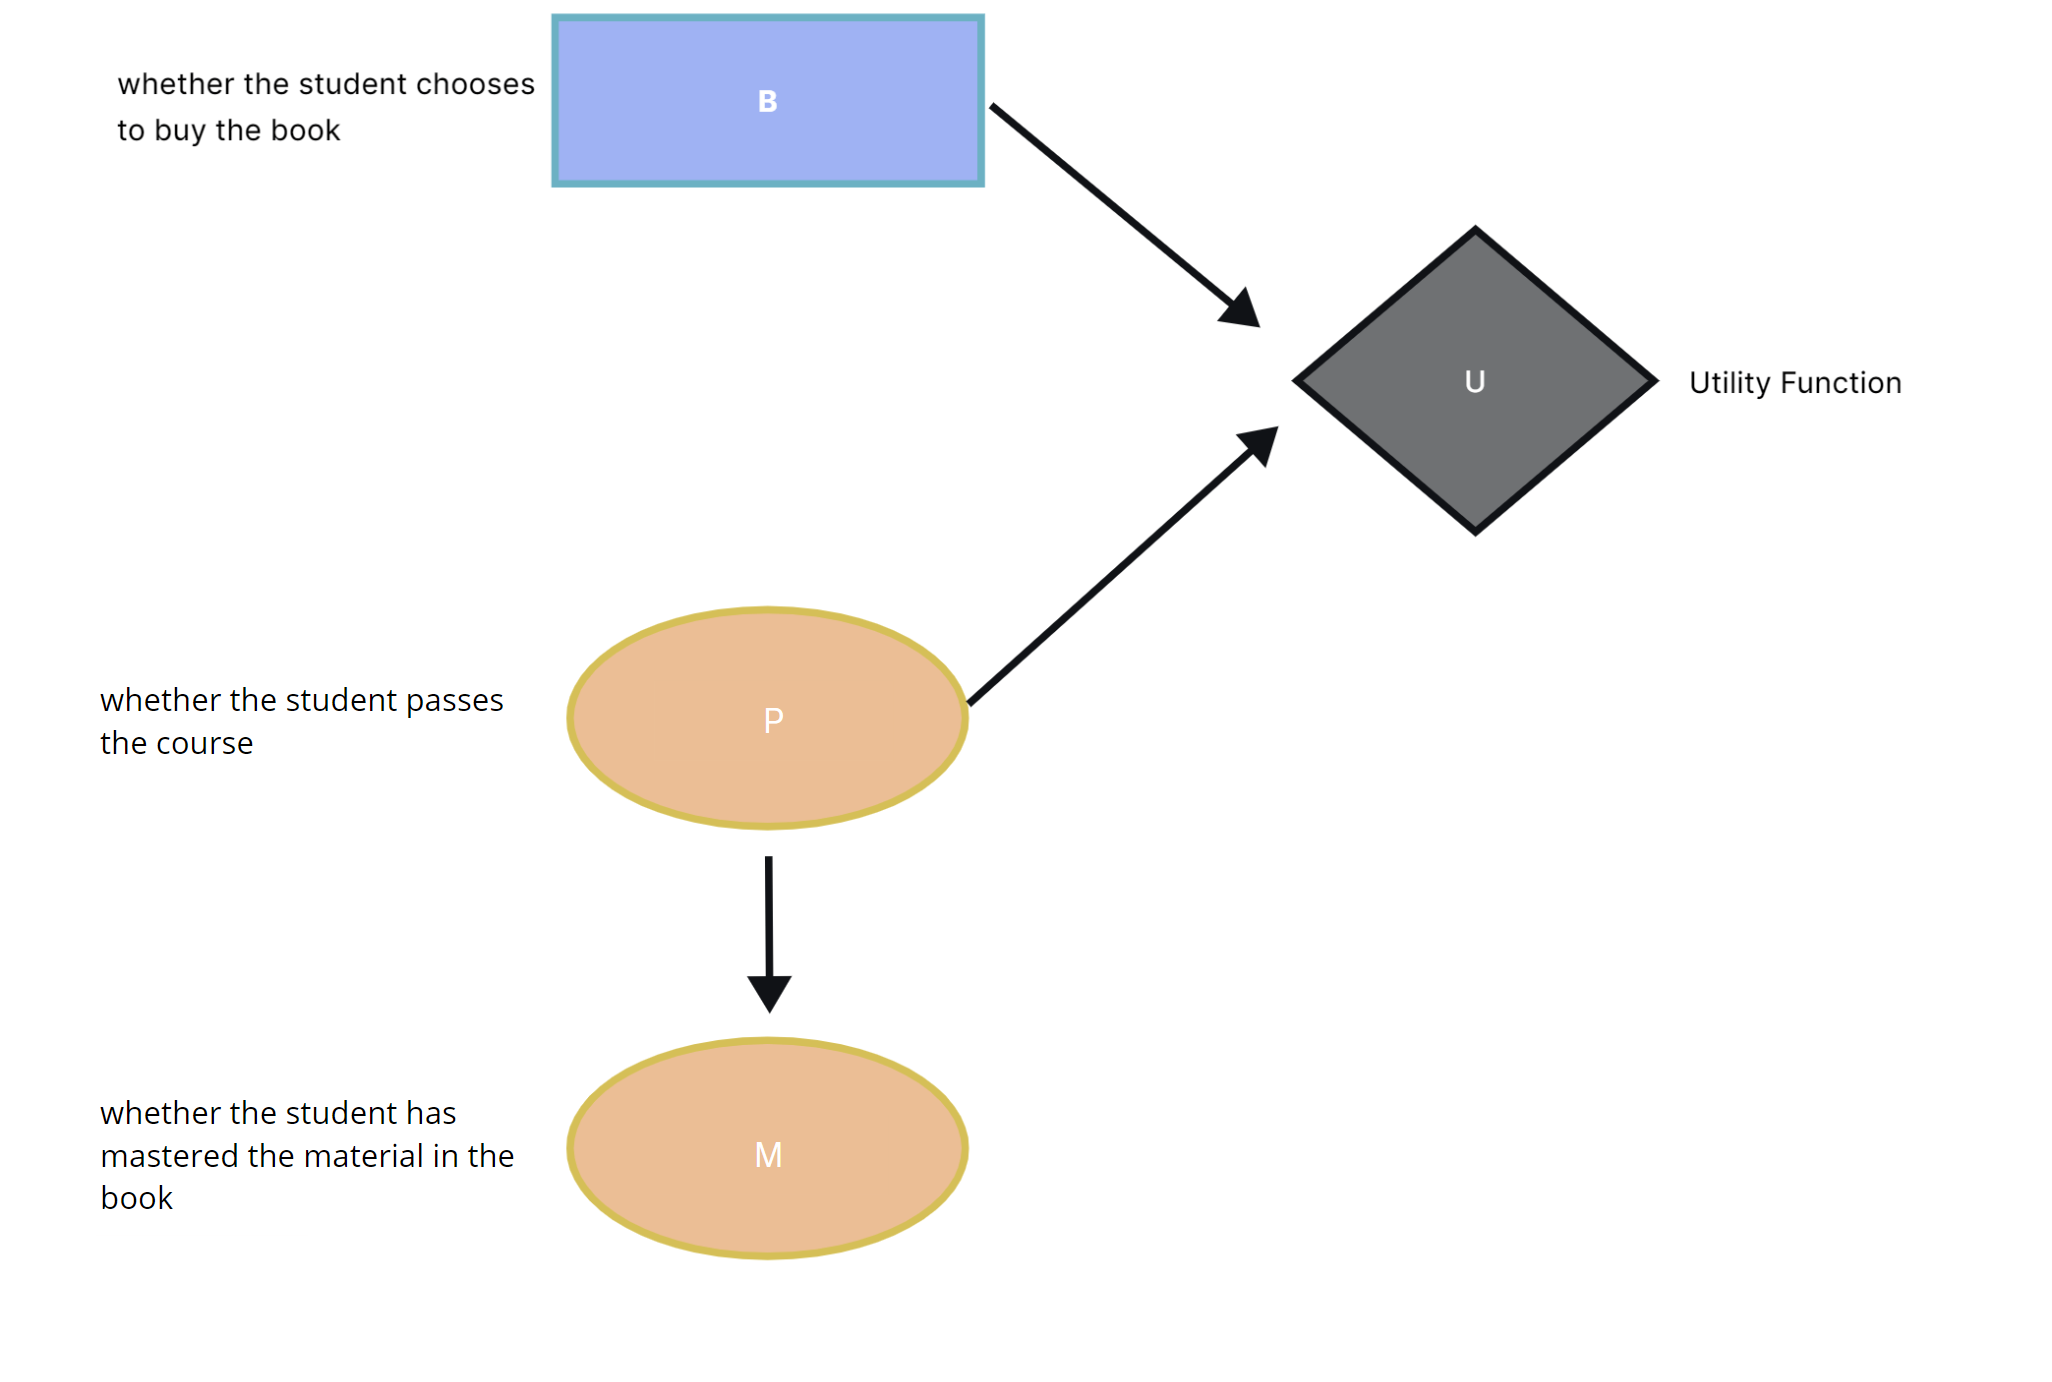


<br><br><br>

```
b. Please discuss what kind of situation that the student should buy the book? (2 marks)
```

Considering the above decision network, inorder to find the situation that the student should buy the book would be when he/she has not mastered the material in the book [`M=False`] or when he/she has not passed the course. [`p=False`]


Designing a distribution table based on the network,

| M      | P(M&#124;p=False) |
| :---   |    :---------:    |
| True   |       0.3         |
| False  |       0.7         |


Designing a utility table based on the network,

| B                  | M           | U(B,M)     |
| :---               |    :----:   |    ----:   |
| True (Buy)         | True        | 0          |
| True (Buy)         | False       | 100        |
| False (Not Buy)    | True        | 70         |
| False (Not Buy)    | False       | 20         |


<br>

1.&nbsp;Buy the book

$EU(buy=True|p=False) = \sum\limits_{m} P(m|p=False)U(buy=True, m)$

`= 0.3 x 0 + 0.7 x 100 =` <u><b>70</b></U>

<br>

2.&nbsp;Not Buy the book

$EU(buy=False|p=False) = \sum\limits_{m} P(m|p=False)U(buy=False, m)$

`= 0.3 x 70 + 0.7 x 20 =` <u><b>35</b></U>


<br>


Therefore,

$MEU(p=False) = \max\limits_{a} EU(a|p=False) = 70$

<br>

```
Optimal Decision = Buy the textbook
```

<br><br><br>

## Subtask 2.2 Heart Disease Prediction using Decision Trees
<hr>

This task concerns heart disease prediction using data from four databases: Cleveland, Hungary, Switzerland and Long Beach V. The data was collected from 1988 and contained many attributes such as age, sex, and resting blood pressure. A pre-processed dataset can be downloaded from myAberdeen. You should:
- Write a description of the dataset provided, including, for instance, how many features there are, the number of classes, examples per class in training and testing sets, and so on.
- Build a decision tree using part of the provided dataset for training and then evaluate your decision tree using part of the provided dataset to measure the decision tree accuracy. Your answer to this item should contain a description of steps you followed to rpopose your decision tree model, including how to import data, how to train a decision tree, the parameter settings of the algorithm, and so on. Consider using the Python library [scikit-learn]('https://scikit-learn.org/').
- Evaluate the decision tree of the previous item, in terms of:

    i. It's prediction accuracy<br>
    ii. How dependent it is on parameter setting (eg. maximum num of leaf nodes)<br>
    iii. Any other relevant characteristics.

## Problem Definition
<hr>
Heart disease prediction using data from four databases: Cleveland, Hungary, Switzerland and Long Beach V. The data was collected from 1988 and contained many attributes such as age, sex, and resting blood pressure. A pre-processed dataset is already provided and can be found inside the 'CS502K_CA3_Task2_dataset' folder. With this dataset:

- Dataset Description
- Predict if they have a heart disease using a decision tree classifier.
- Evaluate the model and state its prediction accuarcy on different parameters.


## Solution
<hr>

In [1]:
# loading dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualisation
from matplotlib import pyplot as plt

#EDA
from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve

In [2]:
# Reading the Training data and Testing data

X_train = pd.read_csv('CS502K_CA3_Task2_dataset/x_train.csv')
y_train = pd.read_csv('CS502K_CA3_Task2_dataset/y_train.csv')

X_test = pd.read_csv('CS502K_CA3_Task2_dataset/x_test.csv')
y_test = pd.read_csv('CS502K_CA3_Task2_dataset/y_test.csv')

In [3]:
X_train.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3


In [4]:
y_train.head()

,class
0,1
1,0
2,1
3,1
4,0


In [5]:
X_train.shape

(300000, 13)

In [6]:
y_train.shape

(300000, 1)

In [7]:
X_train.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,54.410310,0.678577,3.169558,131.340200,249.633492,0.150160,1.019740,149.598946,0.333380,1.051586,1.596153,0.682073,4.714183
std,9.097727,0.467024,0.950532,17.807229,51.790285,0.357229,0.994126,23.090862,0.471422,1.144234,0.629462,0.950810,1.935105
min,27.174373,0.000000,-0.267614,82.918527,101.119555,0.000000,0.000000,63.166763,0.000000,-0.806788,1.000000,0.000000,3.000000
25%,48.060686,0.000000,3.000000,119.945843,216.453899,0.000000,0.000000,135.720082,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.116959,1.000000,3.000000,129.731240,244.257839,0.000000,2.000000,153.250108,0.000000,0.811204,2.000000,0.000000,3.000000
75%,60.661279,1.000000,4.000000,139.913376,274.357185,0.000000,2.000000,165.182180,1.000000,1.672860,2.000000,1.000000,7.000000
max,79.283485,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.707044,3.000000,3.000000,7.000000


In [8]:
y_train.describe()

,class
count,300000.000000
mean,0.443803
std,0.496833
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   300000 non-null  float64
 1   sex                                   300000 non-null  int64  
 2   chest                                 300000 non-null  float64
 3   resting_blood_pressure                300000 non-null  float64
 4   serum_cholestoral                     300000 non-null  float64
 5   fasting_blood_sugar                   300000 non-null  int64  
 6   resting_electrocardiographic_results  300000 non-null  int64  
 7   maximum_heart_rate_achieved           300000 non-null  float64
 8   exercise_induced_angina               300000 non-null  int64  
 9   oldpeak                               300000 non-null  float64
 10  slope                                 300000 non-null  int64  
 11  

In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   class   300000 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


### Dataset Description
<hr>

The preprocessed dataset is majorly divided into two, Training dataset(x_train.csv, y_train.csv) and Testing dataset(x_test.csv, y_test.csv). It contains 14 columns including the class attribute - age, sex, chest, resting_blood_pressure, serum_cholestrol, fasting_blood_sugar, resting_electrocardiographic_results, maximum_heart_rate_achieved, exercise_induced_angina, oldpeak, slope, number_of_major_vessels, thal, class. The class attribute indicates the presence of heart disease in the patient. 

1. **age**: The person’s age in years
<br><br>

2. **sex**: The person’s sex 
    - Value 0: female
    - Value 1: male
<br><br>

3. **chest**: chest pain type
    - Value 0: asymptomatic
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: typical angina
<br><br>

4. **resting_blood_pressure**: The person’s resting blood pressure (mm Hg on admission to the hospital). [above 130-140 is typically cause for concern]
<br><br>

5. **serum_cholestrol**: The person’s cholesterol measurement in mg/dl. [above 200 is cause for concern]
<br><br>

6. **fasting_blood_sugar**: The person’s fasting blood sugar (> 120 mg/dl)
    - Value 0: false
    - Value 1: true
<br><br>

7. **resting_electrocardiographic_results**: resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<br><br>

8. **maximum_heart_rate_achieved**: The person’s maximum heart rate achieved
<br><br>

9. **exercise_induced_angina**: Exercise induced angina
    - Value 0: no
    - Value 1: yes
<br><br>

10. **oldpeak**: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
<br><br>

11. **slope**: the slope of the peak exercise ST segment
    - Value 0: downsloping [signs of unhealthy heart]
    - Value 1: flatsloping [minimal change (typical healthy heart)]
    - Value 2: upsloping [better heart rate with excercise (uncommon)]
<br><br>

12. **number_of_major_vessels**: The number of major vessels (0–3)
<br><br>

13. **thal**: A blood disorder called thalassemia
    - Value 3: normal
    - Value 6: fixed defect: used to be defect but ok now
    - Value 7: reversable defect: no proper blood movement when excercising

<br><br>

14. **class**: Heart disease
    - Value 0: no
    - Value 1: yes

<br><br><br><br>

### Decision Tree Classifier
<hr>

Our aim is to build a decision tree that shows the maximum accuracy while testing. 

Some variables to keep in mind :
- X_train - Features (Training Data)
- y_train - Classes (Training Data)
- X_test - Features (Testing Data) - Validation data X
- y_test - Classes (Testing Data)  - Validation data y


A DecisionTreeClassifier from sklearn has the following parameters :

| Parameters               | Values/DataType                       | Default |
|--------------------------|---------------------------------------|---------|
| criterion                | {“gini”, “entropy”, “log_loss”}       | ”gini”  |
| splitter                 | {“best”, “random”}                    | ”best”  |
| max_depth                | int                                   | None    |
| min_samples_split        | int/float                             | 2       |
| min_samples_leaf         | int/float                             | 1       |
| min_weight_fraction_leaf | float                                 | 0.0     |
| max_features             | int/float or {“auto”, “sqrt”, “log2”} | None    |
| random_state             | int                                   | None    |
| max_leaf_nodes           | int                                   | None    |
| min_impurity_decrease    | float                                 | 0.0     |
| class_weight             | dict, list of dict or "balanced"      | None    |
| ccp_alpha                | non-negative float                    | 0.0     |

In [11]:
# Create Default Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

acc1 = accuracy_score(y_test, y_pred1)

print("Accuracy:", acc1)

Accuracy: 0.8495233333333333


As you can see, a default DecisionTreeClassifier (parameters values are set to default) model has an acuuracy of ~85% when tested with the final validation data. This is already a really good model considering the fact that the data is already processed for skewness. Lets see if we can increase the accuracy by using data-splitting techniques like train_test_split and Kfold. We will build 2 models. The first one uses train_test_split technique with 80% training data and 20% testing data. This division is done on X_train and y_train dataframes. Second one will be using Kfold technique. All models will be evaluated on validation data for accuracy scores.

In [12]:
X_training, X_testing, y_training, y_testing = train_test_split(X_train, y_train, test_size=0.20, random_state = 1)

In [13]:
X_training.shape

(240000, 13)

In [14]:
X_testing.shape

(60000, 13)

In [15]:
y_testing

,class
205179,0
101710,0
89106,1
193046,1
99093,1
...,...
250105,0
202355,1
242397,1
221809,1


In [16]:
# Create Default Decision Tree classifer object with train_test_split
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_training, y_training)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_testing)

acc2 = accuracy_score(y_testing, y_pred2)

print("Accuracy with testing:", acc2)

y_pred2 = clf2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)

print("Accuracy with validation:", acc2)

Accuracy with testing: 0.8469
Accuracy with validation: 0.84799


A DTC (Decision Tree Classifier) model using train_test_split produces an accuracy of ~85% when tested with the validation data. A small difference (~0.3) can be seen in accuracy between the model tested on newly created testing data and the model tested on main validation data.

In [17]:
# Create Default Decision Tree classifer object with Kfold

cv = KFold(n_splits=10, shuffle=True, random_state=42) 
X_numpy = X_train.to_numpy()
accuracies1, accuracies2 = [], []
for train, test in cv.split(X_numpy):
  clf3 = DecisionTreeClassifier(criterion='gini', splitter='best',
            max_depth=None, min_samples_split=2, min_samples_leaf=1,
            min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
  clf3.fit(X_numpy[train], y_train['class'][train])

  accuracies1.append(accuracy_score(y_train['class'][test], clf3.predict(X_numpy[test])))
  accuracies2.append(accuracy_score(y_test, clf3.predict(X_test)))


acc3 = np.mean(accuracies1)
print(f"Mean of expected testing scores: {acc3}")

acc3 = np.mean(accuracies2)
print(f"Mean of expected validation scores: {acc3}")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier 

Mean of expected testing scores: 0.8484033333333334
Mean of expected validation scores: 0.8493973333333333


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


The same trend follows as the DTC model using KFold technique also seems to have an accuracy of ~85% when tested with the validation data. But the execution time for this was higher (~40 seconds) when compared to the previous ones. (less than ~5 seconds)

We can further modify this by finding out the important features in the dataset.

[0.08271814 0.01093438 0.15421443 0.05894254 0.05984058 0.00466594
 0.0103604  0.10334145 0.03259968 0.07496746 0.03861201 0.10586686
 0.26293613]


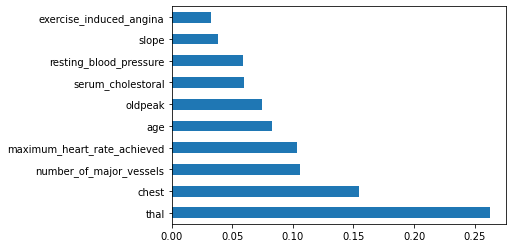

In [18]:
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)

print(clf3.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf3.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


thal, chest, number_of_major_vessels, maximum_heart_rate_achieved and age are the most important features.

Thus, creating a new X variable that only depends on these 5 features.

In [19]:
best_features = SelectFromModel(DecisionTreeClassifier())
best_features.fit(X_train, y_train)

transformedX = best_features.transform(X_train)
print(f"Old Shape: {X_train.shape}, New shape: {transformedX.shape}")

Old Shape: (300000, 13), New shape: (300000, 5)


The new features size is 5 and is named as ```transformedX```.

Using this as input for the KFold;

In [20]:
# Create Default Decision Tree classifer object with Kfold - Best Features

cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  clf4 = DecisionTreeClassifier(criterion='gini', splitter='best',
                                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                                max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
  clf4.fit(transformedX[train], y_train['class'][train])

  accuracies.append(accuracy_score(y_train['class'][test], clf4.predict(transformedX[test])))


acc4 = np.mean(accuracies)
print(f"Mean of expected testing scores: {acc4}")


Mean of expected testing scores: 0.8014800000000001


The accuracy can be seen decreased. (Could be because of less data for interpretation). The accuracy of the model with the best features is ~80%.

### Manipulating the DTC parameters
<hr>

GridSearchCV is a cross-validation method to search and find the best parameter values for the given algorithm. This is computationally expensive when checking for higher range values.

We can use this technique to iterate through different values for max_depth, min_samples_split, min_samples_leaf and get the best values that provide the highest score.

In [21]:
# parameters = {'max_depth': range(1,20), 
#               'min_samples_split': range(2,10), 
#               'min_samples_leaf': range(2, 10)}

# gcv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10,
#                    scoring='accuracy', verbose=1).fit(transformedX, y)


In [22]:
# print(f"Best Estimator: {gcv.best_estimator_}")
# print(f"Best Parameter: {gcv.best_params_}")
# print(f"Best Score: {gcv.best_score_}")

From this, we got the best values for these parameters in the provided range. 

Let's check its accuracy;

In [45]:
# Create Best Decision Tree classifer object with main database

clf5 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=6)

clf5.fit(X=X_train, y=y_train)

acc_ = accuracy_score(y_test, clf5.predict(X_test))

print("Accuracy:", acc_)
print("Accuracy:", acc5)

Accuracy: 0.8902966666666666
Accuracy: 0.8901033333333334


In [40]:
best_dtc_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=6)

An increase of ~10% can be observed when comparing with the previous model. This proves how much a model can vary based on its training parameters.

Checking to see if there can be any improvement in accuracy with train_test_split technique and KFold technique.

In [41]:
# Create Best Decision Tree classifer object with train_test_split

clf6 = best_dtc_model
clf6.fit(X=X_training, y=y_training)

acc6 = accuracy_score(y_testing, clf6.predict(X_testing))

print("Accuracy in testing:", acc6)

acc6 = accuracy_score(y_test, clf6.predict(X_test))

print("Accuracy in validation:", acc6)

Accuracy in testing: 0.8891666666666667
Accuracy in validation: 0.8893933333333334


In [27]:
# Create Best Decision Tree classifer object with Kfold

cv = KFold(n_splits=10, shuffle=True, random_state=42) 
X_numpy = X_train.to_numpy()
accuracies1, accuracies2 = [], []
for train, test in cv.split(X_numpy):
  clf7 = best_dtc_model
  clf7.fit(X_numpy[train], y_train['class'][train])

  accuracies1.append(accuracy_score(y_train['class'][test], clf7.predict(X_numpy[test])))
  accuracies2.append(accuracy_score(y_test, clf7.predict(X_test)))


acc7 = np.mean(accuracies1)
print(f"Mean of expected testing scores: {acc7}")

acc7 = np.mean(accuracies2)
print(f"Mean of expected validation scores: {acc7}")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier 

Mean of expected testing scores: 0.8890800000000001
Mean of expected validation scores: 0.8895413333333334


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [28]:
# Create Best Decision Tree classifer object with Kfold - Best Features

cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  clf8 = best_dtc_model
  clf8.fit(transformedX[train], y_train['class'][train])

  accuracies.append(accuracy_score(
      y_train['class'][test], clf8.predict(transformedX[test])))


acc8 = np.mean(accuracies)
print(f"Mean of expected testing scores: {acc8}")


Mean of expected testing scores: 0.8619533333333333


The Kfold models show similar trend as the ones before. The accuracy is ~89% for the first one and ~86% for the second.

### Model Evaluation
<hr>

In [29]:
# DTC : Decision Tree Classifier
model_ev = pd.DataFrame({'Model': ['Default DTC','Default DTC with train_test_split','Default DTC with Kfold','Default DTC with Kfold (Best Features)',
                    'Best DTC','Best DTC with train_test_split','Best DTC with Kfold','Best DTC with Kfold (Best Features)'], 
                    'Accuracy': [acc1*100, acc2*100, acc3*100, acc4*100, acc5*100, acc6*100, acc7*100, acc8*100]})
model_ev

,Model,Accuracy
0,Default DTC,84.952333
1,Default DTC with train_test_split,84.799000
2,Default DTC with Kfold,84.939733
3,Default DTC with Kfold (Best Features),80.148000
4,Best DTC,89.029667
5,Best DTC with train_test_split,88.939333
6,Best DTC with Kfold,88.954133
7,Best DTC with Kfold (Best Features),86.195333


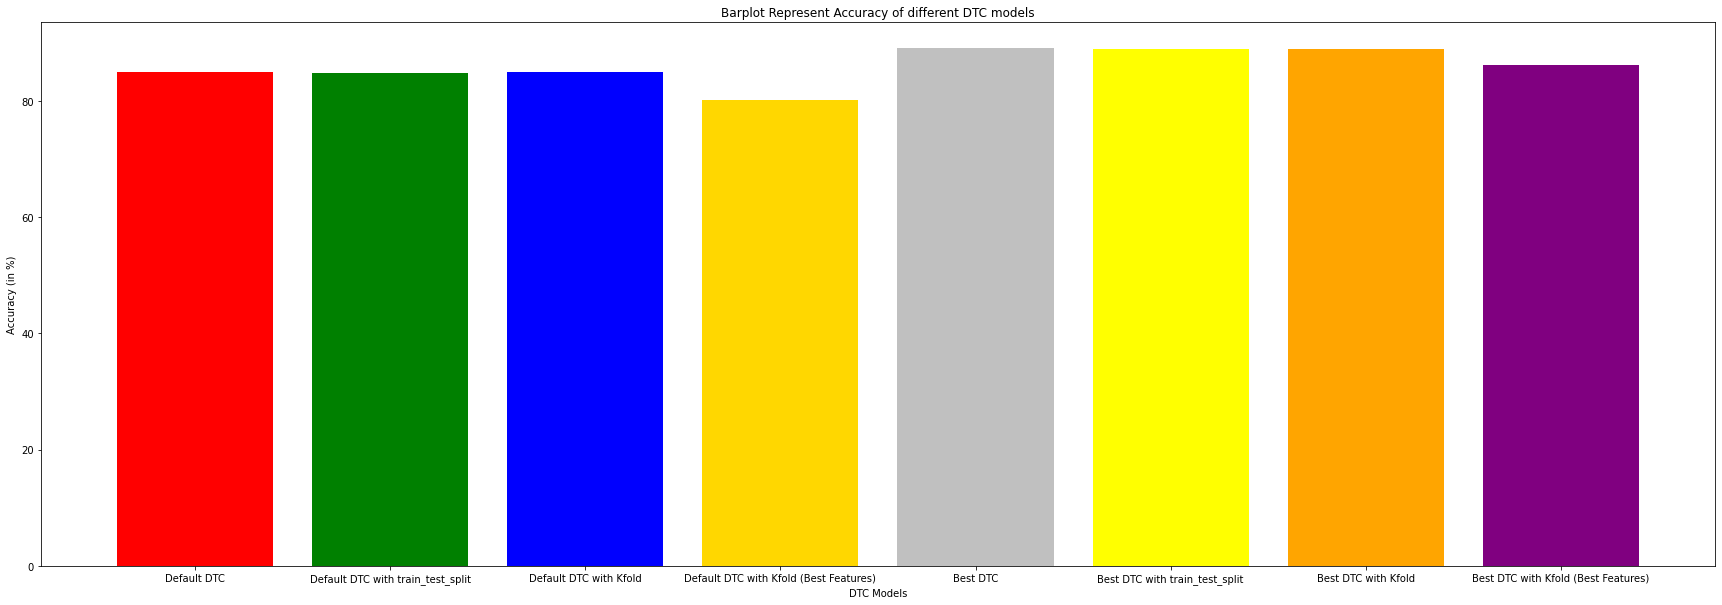

In [30]:
colors = ['red','green','blue','gold','silver','yellow','orange', 'purple',]
plt.figure(figsize=(30,10))
plt.title("Barplot Represent Accuracy of different DTC models")
plt.xlabel("DTC Models")
plt.ylabel("Accuracy (in %)")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

As you can see, although there is no significant room for improvement, we managed to find the best Decision Tree Classifier model for this dataset and we got an accuracy score of ~89%. 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.351717 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.351717 to fit



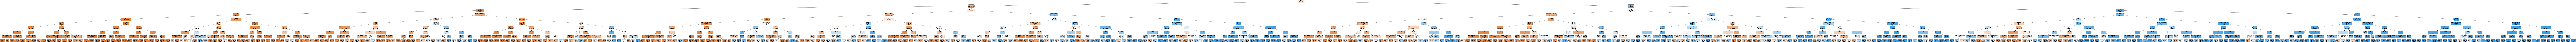

In [33]:
# Decision network of the model

feature_cols = ['age', 'sex', 'chest', 'resting_blood_pressure','serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', 'slope', 'number_of_major_vessels', 'thal']
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
best_dtc_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=6)
best_dtc_model.fit(X=X_train, y=y_train)
export_graphviz(best_dtc_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Subtask 2.3 A Comparison of Decision Networks and Decision Trees
<hr>

## Abstract

## Introduction

### Decision Networks
A decision network (also called an influence diagram) is a graphical representation of a given sequential decision problem. Decision networks is an extended version of belief networks including utility & decision variables.

It is a general mechanism for making rational decisions. 